In [2]:
%run ../src/start.py


python	3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0]
---------------------
Versions:
----------------------
pandas      1.1.2
numpy       1.19.1
matplotlib  3.3.1
seaborn     0.11.0
plotly      4.11.0
----------------------


Loaded Libraries
-------------------
import pandas as pd
import numpy as np
import sys,os
import re
import glob
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
----------------


GLOBAL VARIABLES
--------------------------
HERE_DIR: list current directory path
RAW_DIR: list files in `data\raw` directory
INTER_DIR: list files in `data\interim` directory
FINAL_DIR: list files in `data\final` directory
SRC_DIR: list files in `src\` directory
------------------------------

# SAVE PLOTS
To save a plot call
`save_plots(fig_variable,'name_of_plot')`

source file: src/start.py




# Load Data

In [4]:
# find our data path and files
RAW_DIR

['gitkeep', 'T1.csv']

In [47]:
file_name = 'T1.csv'
raw_data = os.path.join('..','data','raw',f'{file_name}')
df = pd.read_csv(raw_data)

In [48]:
# normalize columns
df.columns = df.columns.str.strip().str.lower().str.replace('/', '_').str.replace('-', '_').str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# rename win direction col to somehting standar
df.rename(columns={"wind_direction_°": "wind_direction_deg"},inplace=True)
df.date_time = pd.to_datetime(df.date_time)

# data overview

num_cols = len(df.columns.tolist())

# Total columns
print('--------------------------------------')
print('total columns: {}'.format(num_cols))
print('total rows: {}'.format(len(df)))
print('--------------------------------------')

--------------------------------------
total columns: 5
total rows: 50530
--------------------------------------


## kaggle Description
[source](https://www.kaggle.com/berkerisen/wind-turbine-scada-dataset)

## Context
In Wind Turbines, Scada Systems measure and save data's like wind speed, wind direction, generated power etc. for 10 minutes intervals. This file was taken from a wind turbine's scada system that is working and generating power in Turkey.

### Content
The data's in the file are:

- Date/Time (for 10 minutes intervals)
- LV ActivePower (kW): The power generated by the turbine for that moment
- Wind Speed (m/s): The wind speed at the hub height of the turbine (the wind speed that turbine use for electricity generation)
- TheoreticalPowerCurve (KWh): The theoretical power values that the turbine generates with that wind speed which is given by the turbine manufacturer
- Wind Direction (°): The wind direction at the hub height of the turbine (wind turbines turn to this direction automaticly)

## Display null data

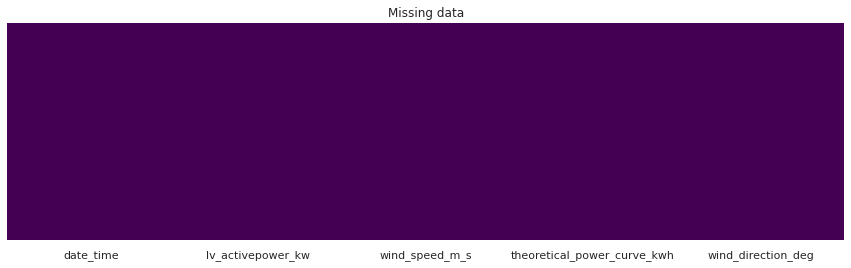

In [29]:
plt.figure(figsize=(15,4))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing data')
plt.show()

In [30]:
df.head()

,date_time,lv_activepower_kw,wind_speed_m_s,theoretical_power_curve_kwh,wind_direction_deg
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286


# convert wind direction 
- https://en.wikipedia.org/wiki/Wind_direction

In [49]:
#import metpy library
import metpy.calc as mpcalc
from metpy.units import units

In [50]:
def convert_to_dir(ang):
    '''convert angle value to cardinal direction'''
    dir_str = mpcalc.angle_to_direction(ang)
    return dir_str

In [52]:
%%time
# create new column with cardinal direction
df["direction"]=df["wind_direction_deg"].apply(convert_to_dir)

CPU times: user 15.2 s, sys: 1.09 s, total: 16.3 s
Wall time: 14.9 s


In [55]:
df.head()

,date_time,lv_activepower_kw,wind_speed_m_s,theoretical_power_curve_kwh,wind_direction_deg,direction
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,W
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,W
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,W
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,W
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,W


In [56]:
# total wind direction values
df.direction.value_counts()

ENE    11433
NE      9101
SSW     6273
NNE     5613
S       3089
SW      2899
E       1853
WSW     1769
N       1628
W       1461
WNW     1042
ESE     1020
NNW      932
NW       885
SSE      821
SE       711
Name: direction, dtype: int64

,date_time,lv_activepower_kw,wind_speed_m_s,theoretical_power_curve_kwh,wind_direction_deg,direction
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,W
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,W
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,W
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,W
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,W


In [39]:
df.direction.value_counts()

ENE    11433
NE      9101
SSW     6273
NNE     5613
S       3089
SW      2899
E       1853
WSW     1769
N       1628
W       1461
WNW     1042
ESE     1020
NNW      932
NW       885
SSE      821
SE       711
Name: direction, dtype: int64